# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2024/2025

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania i oceny notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z fragmentów kodu opracowanego w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce notatnika.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu, odpowiedzi uzupełniane manualnie nie podlegają ocenie.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają na celu wyłapać podstawowe błędy. Przejście przez kod wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie i zostanie ocenione na maksymalną liczbę punktów.
- Zadania należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem). Rozmiar poziomy figur nie powinien przekraczać 20 cali.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł.
- Zakresy osi wykresów przedstawiających rozkłady punktów w przestrzeni powinny być docięte do granic obszaru, na którym został wygenerowany proces punktowy.
- Proporcje osi wykresów przedstawiających rozkłady punktów w przestrzeni powinny być dobrane tak, aby wykresy odzwierciedlały rzeczywisty rozkład punktów w przestrzeni. Nie należy osiągać tego efektu manipulując rozmiarem całej figury.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (nazwa zespołu oraz imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

---

## Zestaw zadań 7: Analiza danych przestrzennych z wykorzystaniem dedykowanych pakietów (część 1)

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [2]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

### Zadanie 1: Import i przygotowanie danych (8 pkt)

Wykorzystując funkcję `geopandas.read_file()` zaimportuj do notatnika dane z trzech załączonych do niego plików i przygotuj na ich podstawie trzy tablice zawierające wybrane dane dotyczące województw, miast oraz dwóch rzek - Wisły i Odry:

1) Tablica `wojewodztwa` zawierająca następujące kolumny:
    - "Nazwa" - nazwy województw
    - "geometry" - geometria obiektów
<br/>
<br/>
2) Tablica `miasta` zawierająca następujące kolumny:
    - "Nazwa" - nazwy miast
    - "geometry" - geometria obiektów
<br/>
<br/>
3) Tablica `rzeki` zawierająca następujące kolumny:
    - "Nazwa" - nazwy rzek
    - "geometry" - geometria obiektów

Wyświetl przygotowane tablice.

Uwagi do wykonania zadania:
 - Pliki zawierają więcej danych niż opisane wyżej tablice. W wynikowych tablicach nie powinny znaleźć się zbędne dane.
 - Poprawny import polskich nazw może wymagać ustawienia odpowiedniej wartości argumentu `encoding` (utf-8 lub 1250) podczas wywoływania funkcji `geopandas.read_file()`.

In [3]:
wojewodztwa = gpd.read_file("Wojewodztwa.zip")
wojewodztwa = wojewodztwa.drop(wojewodztwa.columns[1], axis = 1)
wojewodztwa = wojewodztwa.rename(columns={wojewodztwa.columns[0]: 'Nazwa', wojewodztwa.columns[1]: 'geometry'})

In [4]:
# Komórka testowa
assert type(wojewodztwa) == gpd.geodataframe.GeoDataFrame
assert wojewodztwa.shape == (16, 2)
assert list(wojewodztwa.columns) == ['Nazwa', 'geometry']

In [5]:

miasta = gpd.read_file("Miejscowosci.zip")
miasta = miasta[miasta["rodzaj"] == "miasto"]
miasta = miasta[["nazwaGlown","geometry"]] 
miasta = miasta.rename(columns={miasta.columns[0]: 'Nazwa', miasta.columns[1]: 'geometry'}).reset_index(drop=True)


In [6]:
# Komórka testowa
assert type(miasta) == gpd.geodataframe.GeoDataFrame
assert miasta.shape == (964, 2)
assert list(miasta.columns) == ['Nazwa', 'geometry']

In [7]:
rzeki = gpd.read_file("Rzeki.zip", rows = 2)
rzeki = rzeki.drop(rzeki.columns[1],axis=1) 
rzeki = rzeki.rename(columns={rzeki.columns[0]: 'Nazwa', rzeki.columns[1]: 'geometry'})

In [8]:
# Komórka testowa
assert type(rzeki) == gpd.geodataframe.GeoDataFrame
assert rzeki.shape == (2, 2)
assert list(rzeki.columns) == ['Nazwa', 'geometry']

### Zadanie 2: Transformacja między odwzorowaniami kartograficznymi (2 pkt)

Wczytane dane są zapisane z wykorzystaniem różnych odwzorowań kartograficznych. Przed rozpoczęciem analizy należy je ze sobą uzgodnić.

Korzystając z własności obiektów GeoDataFrame `geopandas.GeoDataFrame.crs` sprawdź odwzorowanie kartograficzne, w którym zapisane są poszczególne tablice. Jeżeli odwzorowanie jest inne niż epsg:2180 dokonaj jego konwersji z wykorzystaniem funkcji `geopandas.GeoDataFrame.to_crs()`.

In [9]:
if wojewodztwa.crs != "epsg:2180":
    wojewodztwa = wojewodztwa.to_crs("epsg:2180")
if miasta.crs != "epsg:2180":
    miasta = miasta.to_crs("epsg:2180")
if rzeki.crs != "epsg:2180":
    rzeki = rzeki.to_crs("epsg:2180")

In [10]:
# Komórka testowa
assert wojewodztwa.crs == "epsg:2180"
assert miasta.crs == "epsg:2180"
assert rzeki.crs == "epsg:2180"

### Zadanie 3: Wizualizacja danych wejściowych (3 pkt)

Korzystając z funkcji pakietu matplotlib oraz funkcji `geopandas.GeoDataFrame.plot()` zwizualizuj komplet przygotowanych danych. Ustaw parametry wykresu oraz wizualizowanych obiektów (wielkość figury, kolory, grubość linii, wielkość punktów itp.) tak, aby wygenerowana mapa była przejrzysta i czytelna.

<Axes: >

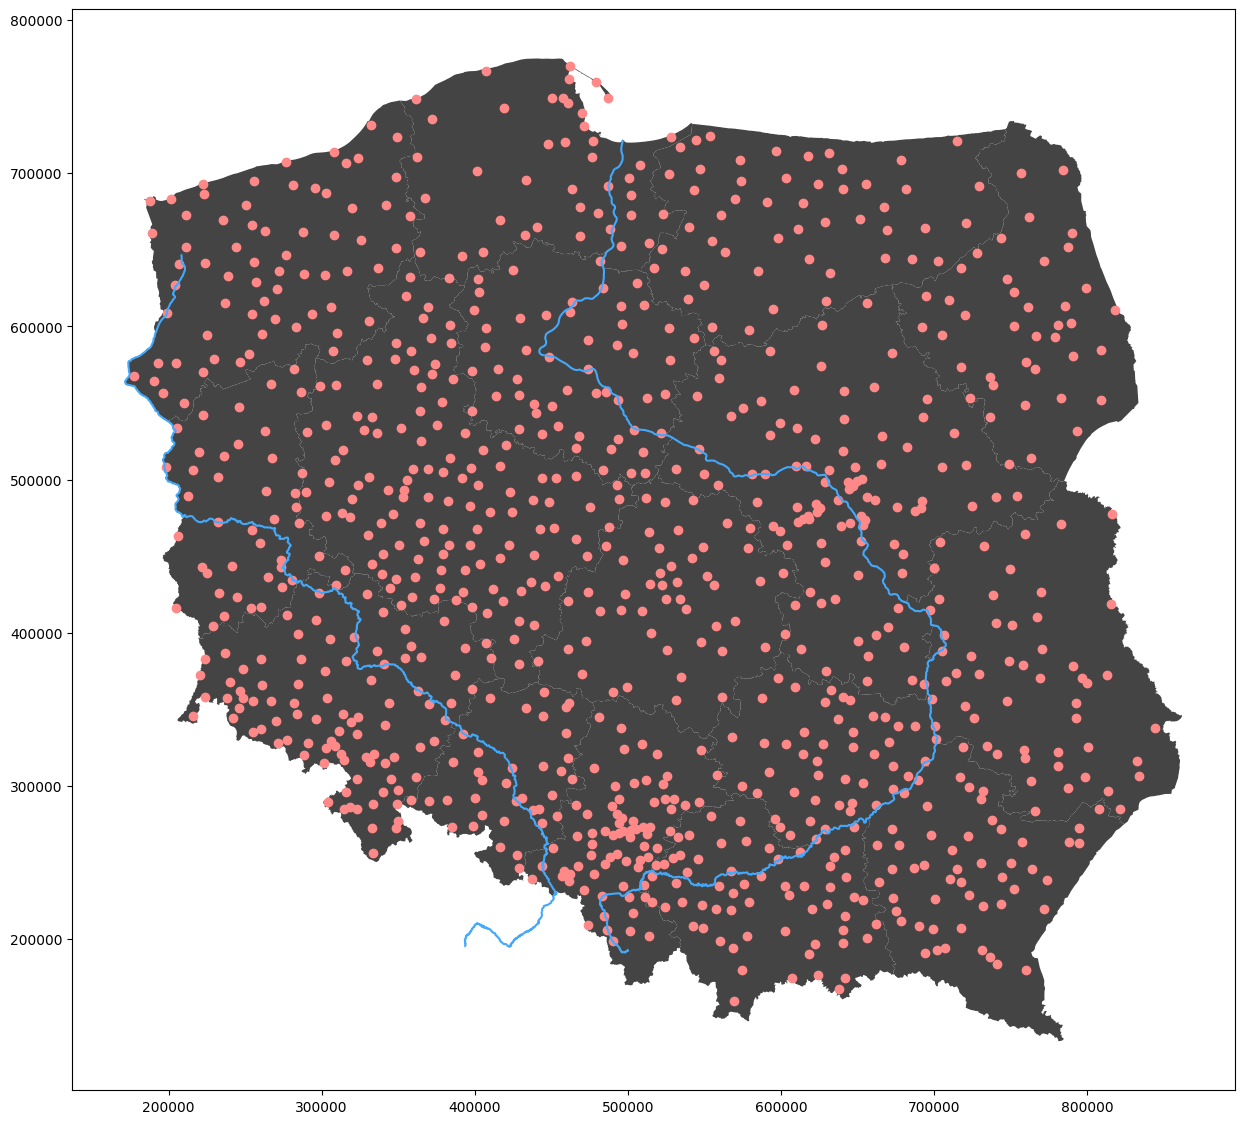

In [11]:
fig, ax = plt.subplots(figsize=(15, 15))
wojewodztwa.plot(ax=ax,color="#444444")
miasta.plot(ax=ax, alpha=1, color="#ff8888")
rzeki.plot(ax=ax, color="#42a9fd")

### Zadanie 4: Mierzenie długości, pola powierzchni i odległości (10 pkt)

#### a) Długość Wisły
Korzystając z własności `geopandas.GeoSeries.length` zmierz długość Wisły w metrach oraz:
 - zapisz wynik do zmiennej `length`,
 - korzystając z funkcji `print()` wyświetl odpowiedź (pełnym zdaniem) na pytanie o długość Wisły podając odpowiedź w kilometrach z dokładnością do 3 miejsc po przecinku.

In [12]:
length = rzeki[rzeki["Nazwa"]=="Wisła"].length[1]
print("Dlugosc Wisly wynosi ",round(length/1000,3)," kilometrow")



Dlugosc Wisly wynosi  1019.758  kilometrow


In [13]:
# Komórka testowa
assert np.isclose(length, 1019757.7991167122)

#### b) Pola powierzchni województw
Korzystając z własności `geopandas.GeoSeries.area` zmierz powierzchnię województw w metrach kwadratowych oraz:
 - zapisz wyniki do tablicy `wojewodztwa` w kolumnie o nazwie "Pole", 
 - oblicz pole powierzchni Polski w metrach kwadartowych i zapisz wynik do zmiennej `area`,
 - korzystając z funkcji `print()` wyświetl odpowiedź na pytanie (pełnym zdaniem) o powierzchnię Polski podając odpowiedź w kilometrach kwadratowych z dokładnością do 3 miejsc po przecinku,
 - przygotuj wizualiację, na której kolor przypisany województwom jest powiązany z ich powierzchnią.

Wizualizacja powinna zawierać:
- województwa, wypełnione kolorem powiązanym z ich powierzchnią,

Ustaw parametry wykresu oraz wizualizowanych obiektów (wielkość figury, kolory, grubość linii, wielkość punktów itp.) tak aby wygenerowana mapa była przejrzysta i czytelna.

In [14]:
pole = np.array([])

for i in wojewodztwa.iterrows():
    pole = np.append(pole,[i[1]["geometry"].area],axis=0)
wojewodztwa["Pole"] = pole
area = sum(pole)

In [15]:
# Komórka testowa
assert np.all(np.isclose(wojewodztwa["Pole"].values, np.array([1.23170381e+10, 9.39998646e+09, 1.16972569e+10, 1.83069651e+10,
                                                               2.01931654e+10, 2.29033672e+10, 1.99361725e+10, 2.97972921e+10,
                                                               1.78437052e+10, 1.51660383e+10, 2.41505782e+10, 1.81944352e+10,
                                                               3.55292977e+10, 1.79475269e+10, 2.51340028e+10, 1.39898166e+10])))
assert np.isclose(area, 312506644577.3843)

<Axes: >

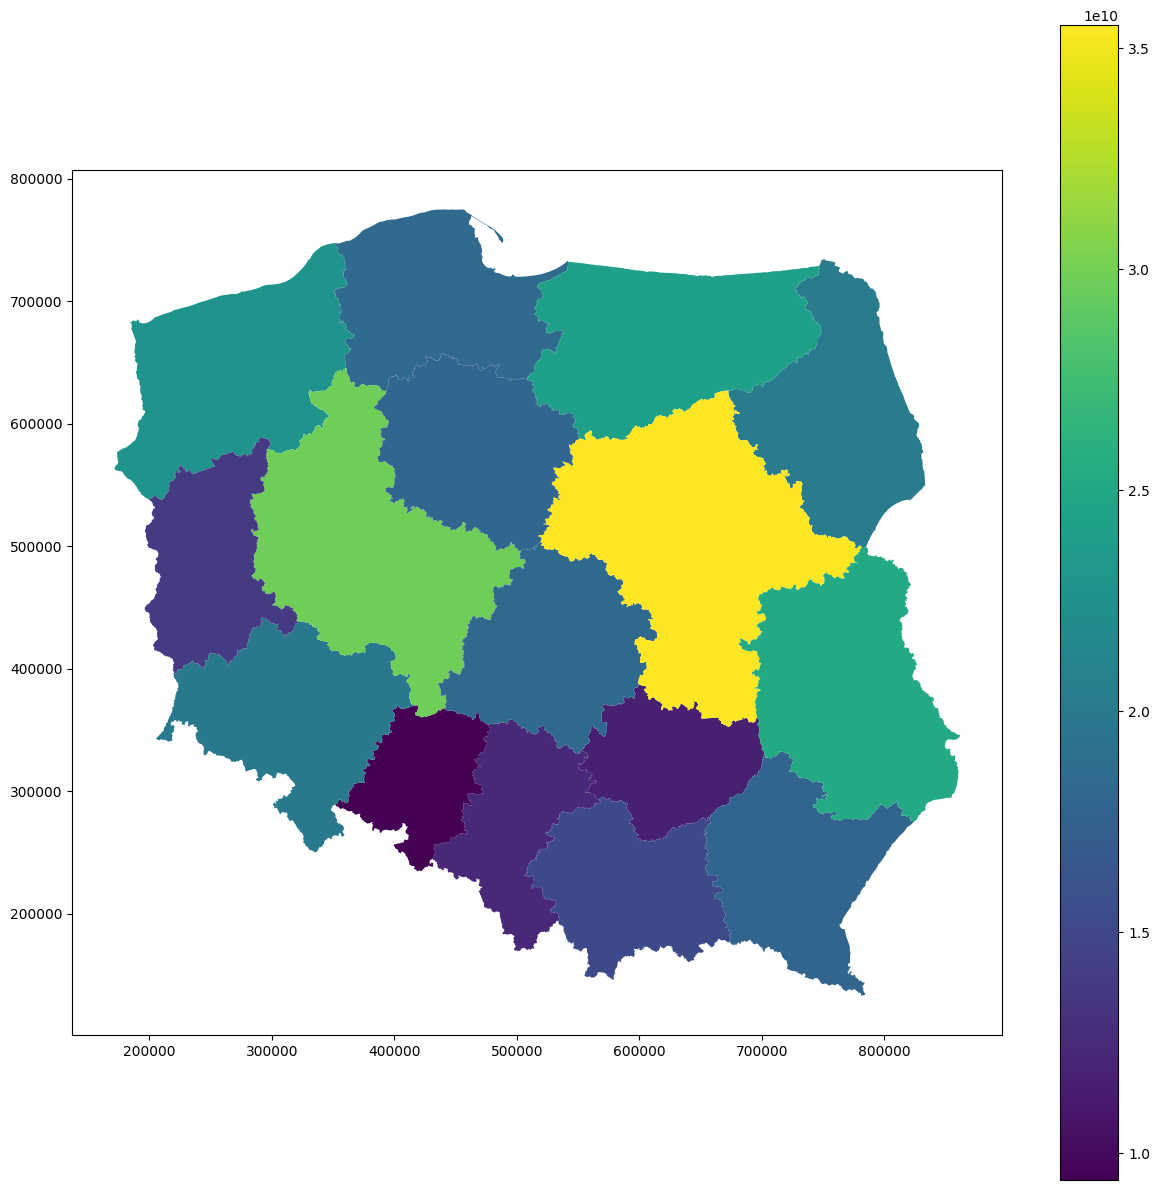

In [16]:
fig, ax = plt.subplots(figsize=(15, 15))
wojewodztwa.plot(ax=ax, legend=True,column="Pole")

#### c) Odległość miast od Krakowa
Korzystając z funkcji `geopandas.GeoSeries.distance()` zmierz odległość poszczególnych miast od Krakowa w metrach oraz:
 - zapisz wyniki do tablicy `miasta` w kolumnie o nazwie "Odległość od Krakowa", 
 - oblicz w jakiej odległości od Krakowa w kilometrach leży Poznań i zapisz wynik do zmiennej `distance`,
 - korzystając z funkcji `print()` wyświetl odpowiedź na pytanie (pełnym zdaniem) w jakiej odległości wyrażonej w kilometrach od Krakowa leży Poznań,
 - przygotuj wizualiację, na której kolor przypisany miastom jest powiązany z ich odległością od Krakowa. 

Wizualizacja powinna zawierać:
- kontury województw, bez wypełnienia,
- lokalicaje miast.

Ustaw parametry wykresu oraz wizualizowanych obiektów (wielkość figury, kolory, grubość linii, wielkość punktów itp.) tak aby wygenerowana mapa była przejrzysta i czytelna.

In [17]:
krakow = miasta.loc[miasta["Nazwa"]=="Kraków","geometry"].reset_index(drop=True)[0]
miasta["Odległość od Krakowa"] = miasta.distance(krakow)
distance =  miasta.loc[miasta["Nazwa"]=="Poznań","Odległość od Krakowa"].reset_index(drop=True)[0]/1000

In [18]:
# Komórka testowa
assert np.isclose(miasta["Odległość od Krakowa"].min(), 0.0)
assert np.isclose(miasta["Odległość od Krakowa"].max(), 579020.726082644)
assert np.isclose(miasta["Odległość od Krakowa"].mean(), 271127.08178774477)
assert np.isclose(distance, 334.60495145299524)

<Axes: >

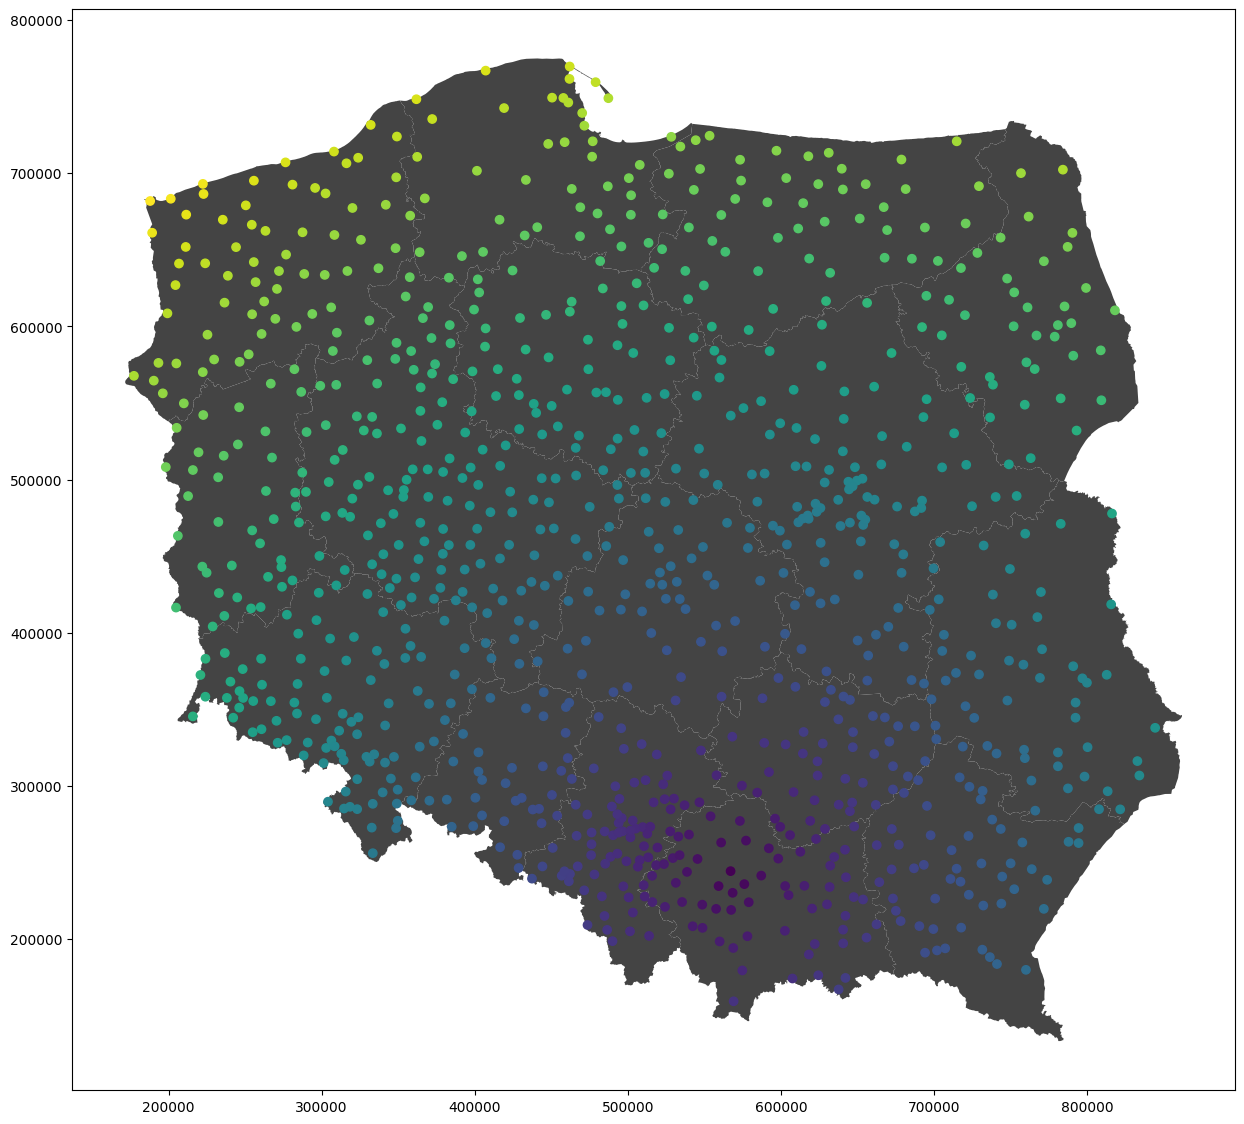

In [19]:
fig, ax = plt.subplots(figsize=(15, 15))
wojewodztwa.plot(ax=ax, color="#444444")
miasta.plot(ax=ax, column="Odległość od Krakowa")

### Zadanie 5: Wykorzystanie prostych operacji geometrycznych (12 pkt)

#### a) Miasta blisko Wisły

Korzystając z funkcji `geopandas.GeoSeries.buffer()` oraz `geopandas.GeoSeries.within()` sprawdź, które miast leżą bliżej niż 20 km od Wisły oraz:
 - zapisz wyniki do tablicy `miasta` w kolumnie o nazwie "Blisko Wisły" (True/False),
 - oblicz ile miast leży bliżej niż 20 km od Wisły i zapisz wynik do zmiennej `cities`,
 - korzystając z funkcji `print()` wyświetl odpowiedź na pytanie (pełnym zdaniem) ile miast leży bliżej niż 20 km od Wisły,
 - przygotuj wizualiację, na której oznaczony zostanie obszar znajdujący się bliżej niż 20 km od Wisły, a znajdujące się w tym obszarze miasta będą wyróżnione kolorem względem pozostałych miast.

Wizualizacja powinna zawierać:
- województwa, wypełnione jednolitym kolorem,
- miasta, w jednym z dwóch wybranych kolorów w zależności od spełnienia analizowanego kryterium.
- rzeki wypełnione jednolitym kolorem,
- oznaczenie terenu leżącego nie dalej niż 20 km od Wisły.

Ustaw parametry wykresu oraz wizualizowanych obiektów (wielkość figury, kolory, grubość linii, wielkość punktów itp.) tak aby wygenerowana mapa była przejrzysta i czytelna.

In [20]:
wisla_geometria = rzeki.loc[rzeki["Nazwa"]=="Wisła","geometry"].reset_index(drop=True)
wisla_buffer = wisla_geometria.buffer(20000)

blisko = np.array([])
for i in miasta.iterrows():
    blisko = np.append(blisko,i[1]["geometry"].within(wisla_buffer),axis=0)
miasta["Blisko Wisły"] = blisko

cities = miasta.loc[miasta["Blisko Wisły"]==True].shape[0]
print(cities)

148


In [21]:
# Komórka testowa
assert cities == 148

<Axes: >

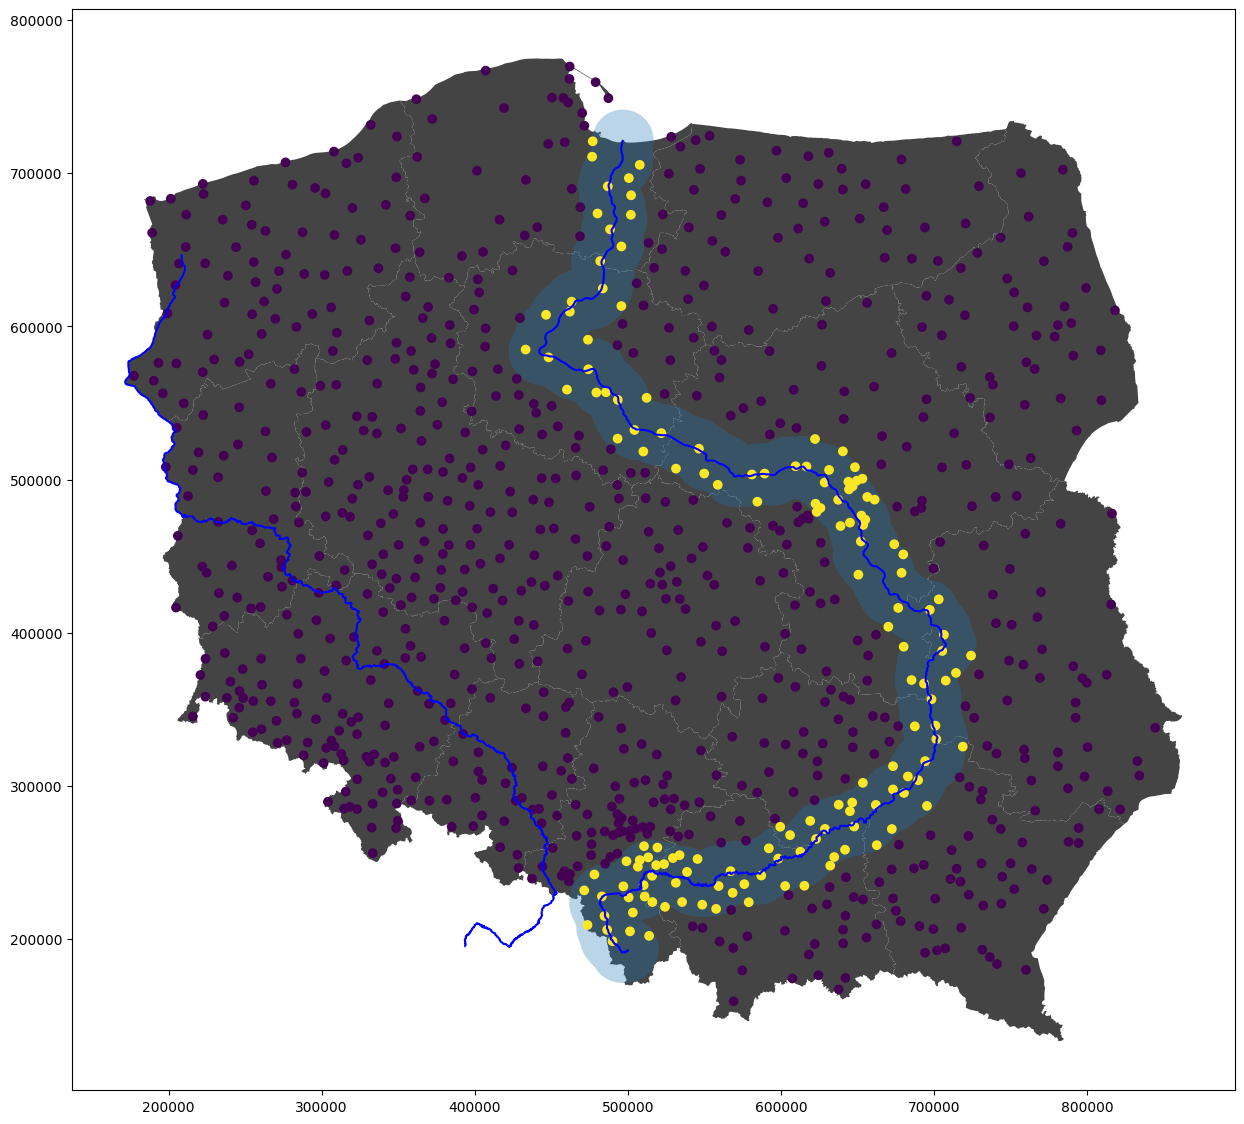

In [22]:
fig, ax = plt.subplots(figsize=(15, 15))
wojewodztwa.plot(ax=ax, color="#444444")
rzeki.plot(ax=ax, color="#0000ff")
wisla_buffer.plot(ax=ax, alpha = 0.3)
miasta.plot(ax=ax,column="Blisko Wisły")

#### b) Województwa, przez które przepływa Odra
Korzystając z funkcji `geopandas.GeoSeries.intersects()` sprawdź, przez które województwa przepływa Odra oraz:
 - zapisz wyniki do tablicy `wojewodztwa` w kolumnie o nazwie "Odra w obrębie" (True/False) oraz do zmiennej `voivodeships` (lista województw, przez które przepływa Odra),
 - korzystając z funkcji `print()` wyświetl odpowiedź na pytanie (pełnym zdaniem) przez które województa przepływa Odra,
 - przygotuj wizualiację, na której województwa przez które przepływa Odra będą wyróżnione kolorem względem pozostałych województw.

Wizualizacja powinna zawierać:
- województwa, wypełnione jednym z dwóch wybranych kolorów w zależności od spełnienia analizowanego kryterium,
- miasta, wypełnione jednolitym kolorem,
- rzeki wypełnione jednolitym kolorem.

Ustaw parametry wykresu oraz wizualizowanych obiektów (wielkość figury, kolory, grubość linii, wielkość punktów itp.) tak aby wygenerowana mapa była przejrzysta i czytelna.

In [23]:
odra_geometria = rzeki.loc[rzeki["Nazwa"]=="Odra","geometry"].reset_index(drop=True)

przeplywa = np.array([])
for i in wojewodztwa.iterrows():
    przeplywa = np.append(przeplywa,i[1]["geometry"].intersects(odra_geometria),axis=0)
wojewodztwa["Odra w obrębie"] = przeplywa

voivodeships =  wojewodztwa.loc[wojewodztwa["Odra w obrębie"]==True,"Nazwa"].to_list()
print(voivodeships)

['śląskie', 'opolskie', 'zachodniopomorskie', 'dolnośląskie', 'lubuskie']


In [24]:
# Komórka testowa
assert sorted(voivodeships) == ['dolnośląskie', 'lubuskie', 'opolskie', 'zachodniopomorskie', 'śląskie']

<Axes: >

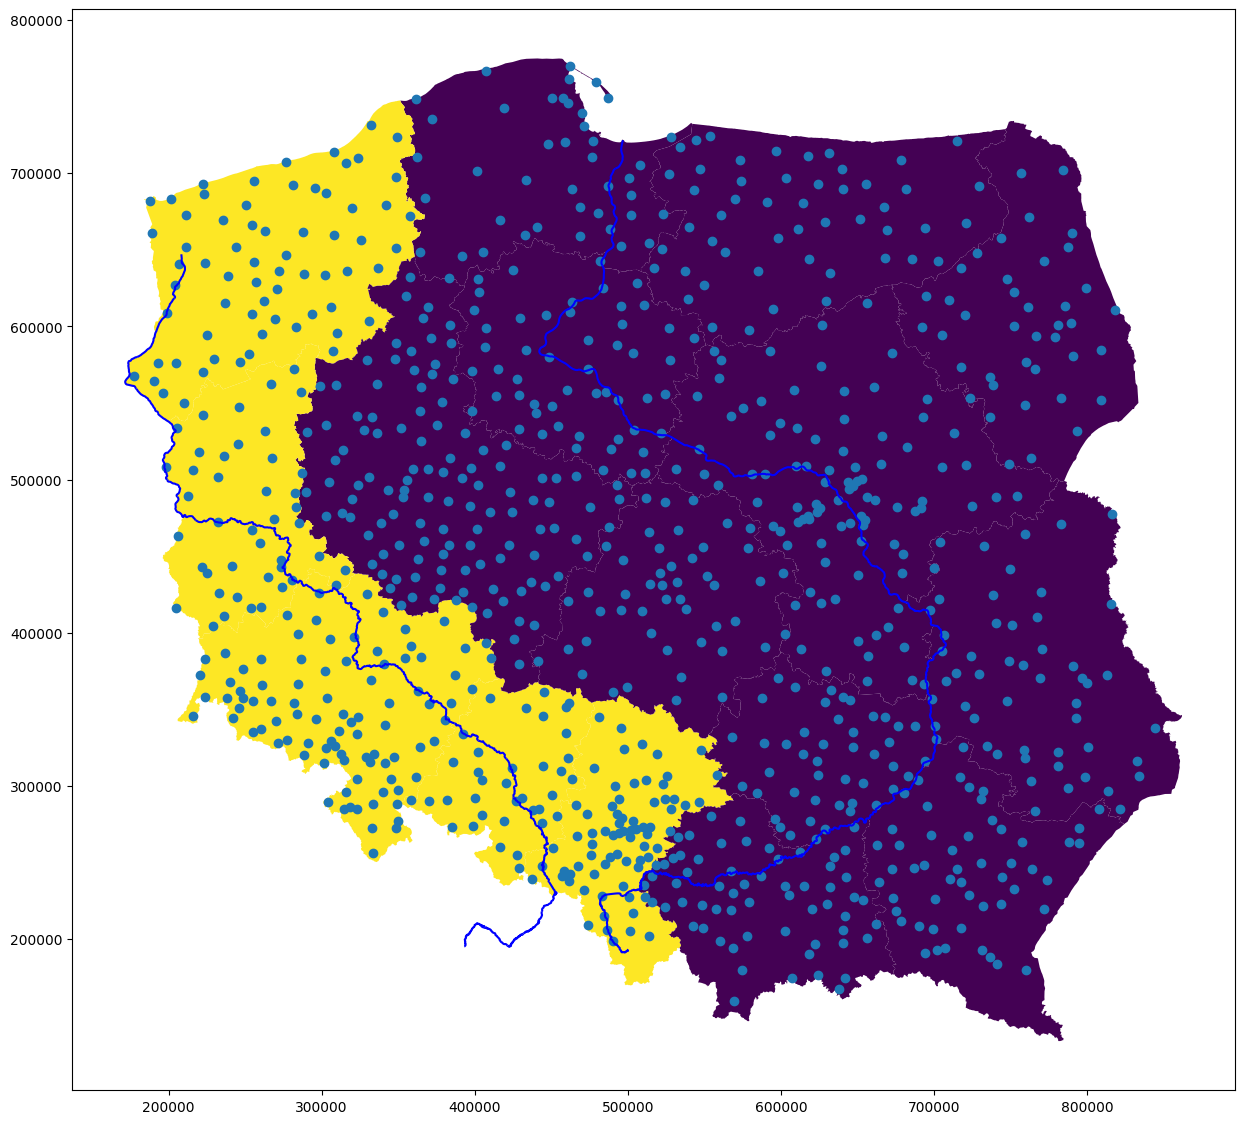

In [25]:
fig, ax = plt.subplots(figsize=(15, 15))
wojewodztwa.plot(ax=ax,column="Odra w obrębie")
rzeki.plot(ax=ax, color="#0000ff")
miasta.plot(ax=ax)